Import fichier pour mise en forme dans dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
repertoire = '/content/drive/MyDrive/Nao_School/Projet1/dataset'

In [ ]:
!ls $repertoire

CO2_habitant.xlsx  EnergieConsumption.xlsx  population.xlsx	temp_evol.xlsx
df_final.xlsx	   niveau_richesse.xlsx     temp_ev_month.xlsx


In [3]:
import pandas as pd
df_final = pd.read_excel(repertoire + '/df_final.xlsx')

#Lien entre nos données 🖇

---



,CO2_level,Total population,Temp_values,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
CO2_level,1.000000,-0.229902,-0.025458,0.017792,0.407855,0.286301,0.163808,0.314730,0.037173,0.087070,0.324568
Total population,-0.229902,1.000000,-0.106499,0.771481,0.127303,0.249906,0.563616,0.050088,0.256047,0.343062,0.367201
Temp_values,-0.025458,-0.106499,1.000000,-0.043691,-0.019857,0.030469,0.019593,0.029131,0.056164,0.054666,-0.046700
Coal Consumption - EJ,0.017792,0.771481,-0.043691,1.000000,0.358098,0.495188,0.836390,0.263263,0.408674,0.549810,0.598661
Gas Consumption - EJ,0.407855,0.127303,-0.019857,0.358098,1.000000,0.876615,0.423957,0.852596,0.329219,0.530063,0.935205
Geo Biomass Other - TWh,0.286301,0.249906,0.030469,0.495188,0.876615,1.000000,0.553229,0.750867,0.579850,0.716404,0.885724
Hydro Generation - TWh,0.163808,0.563616,0.019593,0.836390,0.423957,0.553229,1.000000,0.341847,0.489543,0.623907,0.589388
Nuclear Generation - TWh,0.314730,0.050088,0.029131,0.263263,0.852596,0.750867,0.341847,1.000000,0.217792,0.408820,0.840175
Solar Generation - TWh,0.037173,0.256047,0.056164,0.408674,0.329219,0.579850,0.489543,0.217792,1.000000,0.847447,0.346262
Wind Generation -TWh,0.087070,0.343062,0.054666,0.549810,0.530063,0.716404,0.623907,0.408820,0.847447,1.000000,0.535133


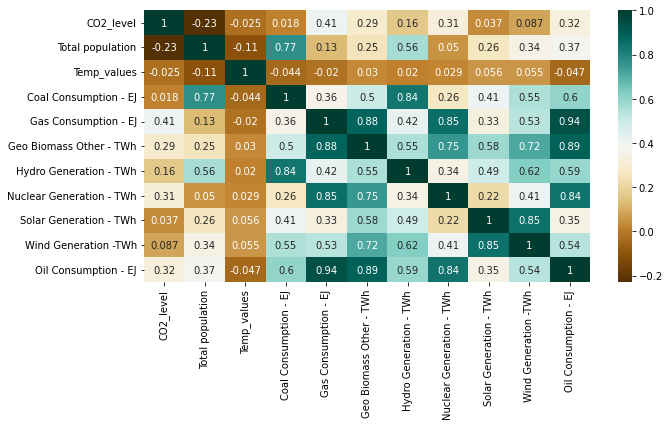

In [94]:
plt.figure(figsize=(10,5))
fig = df_final[['CO2_level','Total population','Temp_values','Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].corr()
sns.heatmap(fig,cmap="BrBG",annot=True)
fig


#Evolution de la population face à l'évolution des consommations des énergies sur des 18 pays ⛽ ♻

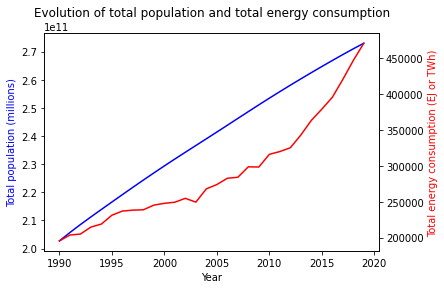

In [92]:
import matplotlib.pyplot as plt


# Créer des sous-ensembles de données pour le total de population et la consommation d'énergie pour toutes les sources d'énergie
pop_data = df_final.groupby('Year')['Total population'].sum()
energy_data = df_final.groupby('Year')[['Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].sum()

# Calculer la consommation totale d'énergie pour chaque année
energy_data['Total energy consumption'] = energy_data.sum(axis=1)

# Créer le graphique
fig, ax1 = plt.subplots()

# Tracer la courbe pour le total de population
ax1.plot(pop_data.index, pop_data.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total population (millions)', color='blue')

# Créer un deuxième axe pour la consommation d'énergie
ax2 = ax1.twinx()

# Tracer la courbe pour la consommation d'énergie
ax2.plot(energy_data.index, energy_data['Total energy consumption'].values, color='red')
ax2.set_ylabel('Total energy consumption (EJ or TWh)', color='red')

# Ajouter les légendes et titres
plt.title('Evolution of total population and total energy consumption')
plt.show()




#Evolution de la consommation des énergies selon les niveaux de revenus des pays 🔋

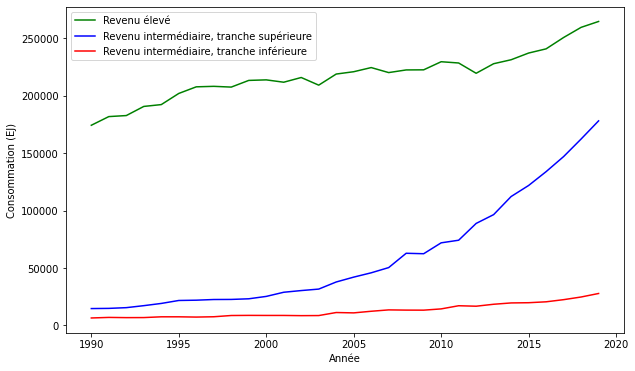

In [93]:

import matplotlib.pyplot as plt



# Filtre pour les années souhaitées
start_year = df_final['Year'].min()
end_year = df_final['Year'].max()
df_filtered = df_final[(df_final['Year'] >= start_year) & (df_final['Year'] <= end_year)]

# Création d'un dictionnaire pour stocker les données de consommation par groupe de revenus
data = {}
for eg in df_filtered['Income_Group'].unique():
    # Filtre pour le groupe de revenus en cours
    df_eg = df_filtered[df_filtered['Income_Group'] == eg]
    # Initialisation des données
    data[eg] = []
    for year in range(start_year, end_year + 1):
        # Filtre pour l'année en cours
        df_year = df_eg[df_eg['Year'] == year]
        # Récupération des données de consommation totale de toutes les énergies
        total_consumption = df_year[energy_columns].sum().sum()
        # Ajout des données dans le dictionnaire
        data[eg].append(total_consumption)

# Tracé des courbes d'évolution pour chaque groupe de revenus
fig, ax = plt.subplots(figsize=(10,6))
colors = {'Revenu élevé': 'green', 'Revenu intermédiaire, tranche supérieure': 'blue', 'Revenu intermédiaire, tranche inférieure': 'red', 'Pays les moins avancés': 'orange'}
for eg in df_filtered['Income_Group'].unique():
    x = range(start_year, end_year + 1)
    y = data[eg]
    ax.plot(x, y, label=eg, color=colors[eg])
ax.set_xlabel('Année')
ax.set_ylabel('Consommation (EJ)')
ax.legend()
plt.show()


#Evolution du niveau de CO2 selon le niveau de revenus des pays (de 1990 à 2020) 

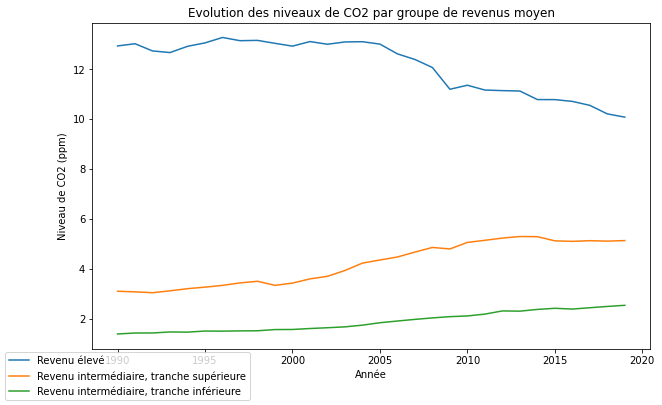

In [62]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes à visualiser
cols_temp = ['Year', 'Element', 'Temp_values']
cols_co2 = ['Year', 'CO2_level']
cols_income = ['Year', 'Income_Group']

# Filtrer les données pour ne garder que les niveaux de CO2
df_co2 = df_final[(df_final[cols_co2[1]] > 0)]

# Définir les couleurs à utiliser pour chaque groupe de revenus moyen
colors = {'Revenu élevé': 'tab:blue', 'Revenu intermédiaire, tranche supérieure': 'tab:orange', 'Revenu intermédiaire, tranche inférieure': 'tab:green'}

# Créer le graphique
fig, ax = plt.subplots(figsize=(10,6))

# Ajouter les courbes de CO2 sur l'axe des ordonnées gauche
ax.set_xlabel('Année')
ax.set_ylabel('Niveau de CO2 (ppm)')
for col in df_co2[cols_income[1]].unique():
    co2 = df_co2[df_co2[cols_income[1]] == col].groupby('Year')[[cols_co2[1]]].mean()
    ax.plot(co2.index, co2.values, label=col, color=colors[col])
ax.tick_params(axis='y')

# Ajouter les légendes et le titre
ax.legend()
plt.title("Evolution des niveaux de CO2 par groupe de revenus moyen")

# Ajouter une légende en dehors du graphe
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left')

# Récupérer l'objet Legend associé à l'axe
leg = ax.get_legend()

# Masquer le bloc de couleurs
leg.remove()

# Afficher le graphique
plt.show()



#Evolution des écarts de températures face à leur écart type selon le type de revenus des pays 🥵 🌡

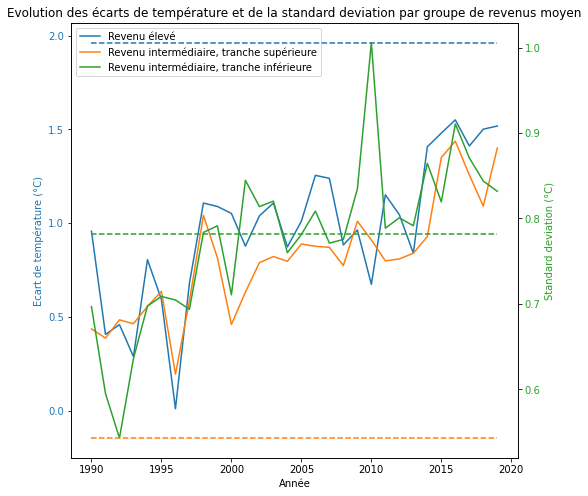

In [34]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes à visualiser
cols_temp = ['Year', 'Element', 'Temp_values']
cols_income = ['Year', 'Income_Group']

# Filtrer les données pour ne garder que les températures et la standard deviation
df_temp = df_final[(df_final[cols_temp[1]] == 'Temperature change') | (df_final[cols_temp[1]] == 'Standard Deviation')]

# Définir les couleurs à utiliser pour chaque groupe de revenus moyen
colors = {'Revenu élevé': 'tab:blue', 'Revenu intermédiaire, tranche supérieure': 'tab:orange', 'Revenu intermédiaire, tranche inférieure': 'tab:green'}

# Créer le graphique
fig, ax1 = plt.subplots(figsize=(8,8))

# Ajouter les courbes d'écart de température sur l'axe des ordonnées gauche
ax1.set_xlabel('Année')
ax1.set_ylabel('Ecart de température (°C)', color=colors['Revenu élevé'])
ax1.tick_params(axis='y', labelcolor=colors['Revenu élevé'])
for col in df_temp[cols_income[1]].unique():
    temp = df_temp[(df_temp[cols_income[1]] == col) & (df_temp[cols_temp[1]] == 'Temperature change')].groupby('Year')[['Temp_values']].mean()
    ax1.plot(temp.index, temp.values, label=col, color=colors[col])
ax1.legend(loc='upper left')

# Ajouter les courbes de standard deviation sur l'axe des ordonnées droit
ax2 = ax1.twinx()
ax2.set_ylabel('Standard deviation (°C)', color=colors['Revenu intermédiaire, tranche inférieure'])
ax2.tick_params(axis='y', labelcolor=colors['Revenu intermédiaire, tranche inférieure'])
for col in df_temp[cols_income[1]].unique():
    std = df_temp[(df_temp[cols_income[1]] == col) & (df_temp[cols_temp[1]] == 'Standard Deviation')].groupby('Year')[['Temp_values']].mean()
    ax2.plot(std.index, std.values, label=col, color=colors[col], linestyle='--')
ax2.legend(loc='upper right')

# Ajouter les légendes et le titre
plt.title('Evolution des écarts de température et de la standard deviation par groupe de revenus moyen')
# Récupérer l'objet Legend associé à l'axe 2
leg2 = ax2.get_legend()

# Masquer le bloc de couleurs
leg2.set_visible(False)
# Afficher le graphique
plt.show()


#Evolution du niveau de CO2 par habitant face à l'évolution des écarts de températures selon le niveau de revenu des pays 🌡 

<ipython-input-59-b91c196a2559>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Temp_diff'] = df_temp[cols_temp[2]] - df_temp.groupby(['Country_Code', cols_income[1]])[cols_temp[2]].transform('mean')


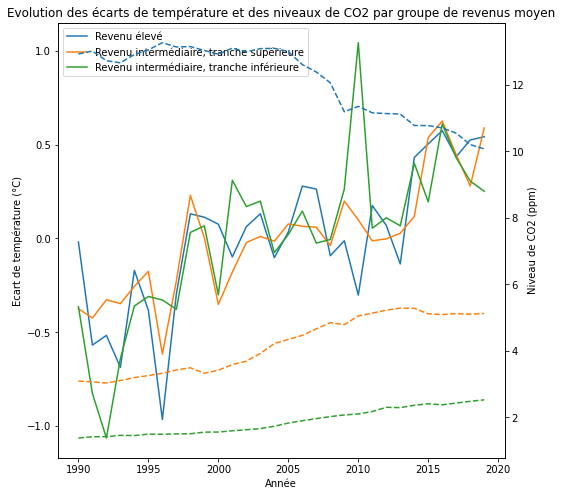

In [59]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes à visualiser
cols_temp = ['Year', 'Element', 'Temp_values']
cols_co2 = ['Year', 'CO2_level']
cols_income = ['Year', 'Income_Group']

# Filtrer les données pour ne garder que les températures
df_temp = df_final[(df_final[cols_temp[1]] == 'Temperature change')]

# Calculer l'écart de température pour chaque pays
df_temp['Temp_diff'] = df_temp[cols_temp[2]] - df_temp.groupby(['Country_Code', cols_income[1]])[cols_temp[2]].transform('mean')

# Définir les couleurs à utiliser pour chaque groupe de revenus moyen
colors = {'Revenu élevé': 'tab:blue', 'Revenu intermédiaire, tranche supérieure': 'tab:orange', 'Revenu intermédiaire, tranche inférieure': 'tab:green'}

# Créer le graphique
fig, ax1 = plt.subplots(figsize=(8,8))

# Ajouter les courbes d'écart de température sur l'axe des ordonnées gauche
ax1.set_xlabel('Année')
ax1.set_ylabel('Ecart de température (°C)', color='black')
for col in df_temp[cols_income[1]].unique():
    temp = df_temp[df_temp[cols_income[1]] == col].groupby('Year')[['Temp_diff']].mean()
    ax1.plot(temp.index, temp.values, label=col, color=colors[col])
ax1.tick_params(axis='y', labelcolor='black')

# Ajouter les courbes de CO2 sur l'axe des ordonnées droit
ax2 = ax1.twinx()
ax2.set_ylabel('Niveau de CO2 (ppm)', color='black')
for col in df_final[cols_income[1]].unique():
    co2 = df_final[df_final[cols_income[1]] == col].groupby('Year')[[cols_co2[1]]].mean()
    ax2.plot(co2.index, co2.values, label=col, color=colors[col], linestyle='--')
ax2.tick_params(axis='y', labelcolor='black')

# Ajouter les légendes et le titre
ax1.legend()
ax2.legend()
plt.title('Evolution des écarts de température et des niveaux de CO2 par groupe de revenus moyen')

# Ajouter les blocs de légende en dehors du graphe
legend_handles = []
for income_group, color in colors.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=income_group, markerfacecolor=color, markersize=10))
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(3.05, 0.5))

# Récupérer l'objet Legend associé à l'axe
leg = ax2.get_legend()

# Masquer le bloc de couleurs
leg.remove()

# Afficher le graphique
plt.show()


#Global - Consommation des énergies vertes vs consommation des énergies fossiles selon les types de revenus des pays 🛢 ♻

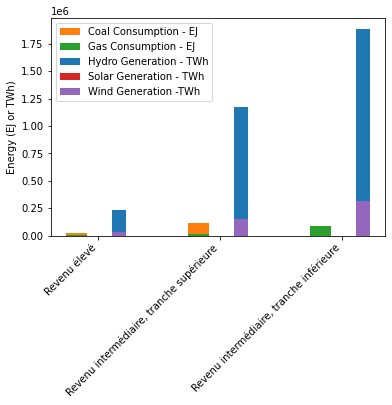

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Subset the data for the desired columns
df_energy = df_final[['Country_Code', 'Year', 'Income_Group', 'Coal Consumption - EJ', 'Gas Consumption - EJ', 'Hydro Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh']]

# Group the data by income group
df_grouped = df_energy.groupby('Income_Group')

# Get the list of income groups
income_groups = df_energy['Income_Group'].unique()

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the width of the bars
width = 0.35

# Set the index for the x-axis
x = np.arange(len(income_groups))

# Set the colors for the bars
colors_fossil = ['#ff7f0e', '#2ca02c']
colors_green = ['#1f77b4', '#d62728', '#9467bd']

# Loop through the energy types and plot the bars for each income group
energy_types_fossil = ['Coal Consumption - EJ', 'Gas Consumption - EJ']
energy_types_green = ['Hydro Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh']

for i, energy_type in enumerate(energy_types_fossil):
    energy_data = []
    for group_name, group_data in df_grouped:
        energy_data.append(group_data[energy_type].sum())
    rects = ax.bar(x - width/2, energy_data, width/len(energy_types_fossil), label=energy_type, color=colors_fossil[i])

for i, energy_type in enumerate(energy_types_green):
    energy_data = []
    for group_name, group_data in df_grouped:
        energy_data.append(group_data[energy_type].sum())
    rects = ax.bar(x + width/2, energy_data, width/len(energy_types_green), label=energy_type, color=colors_green[i])

# Set the labels for the x-axis and y-axis
ax.set_xticks(x)
ax.set_xticklabels(income_groups, rotation=45, ha='right')
ax.set_ylabel('Energy (EJ or TWh)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


#Evolution des consommations d'énergies fossiles vs vertes selon les types de revenus (échelle :  1 ExaJoule = 277,78 TéraWatt-Heure) 🛢 ♻ ↗

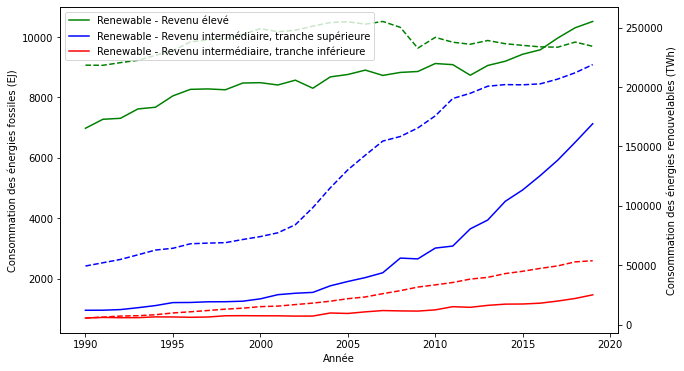

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtre pour les années souhaitées
start_year = df_final['Year'].min()
end_year = df_final['Year'].max()
df_filtered = df_final[(df_final['Year'] >= start_year) & (df_final['Year'] <= end_year)]

# Création d'un dictionnaire pour stocker les données de consommation des énergies fossiles et vertes
data = {}
for eg in df_filtered['Income_Group'].unique():
    # Filtre pour le groupe de revenus en cours
    df_eg = df_filtered[df_filtered['Income_Group'] == eg]
    # Initialisation des données
    data[eg] = {'Fossil': [], 'Renewable': []}
    for year in range(start_year, end_year + 1):
        # Filtre pour l'année en cours
        df_year = df_eg[df_eg['Year'] == year]
        # Récupération des données de consommation pour les énergies fossiles et vertes
        fossil_consumption = df_year['Coal Consumption - EJ'].sum() + df_year['Gas Consumption - EJ'].sum() + df_year['Oil Consumption - EJ'].sum()
        renewable_consumption = df_year['Geo Biomass Other - TWh'].sum() + df_year['Hydro Generation - TWh'].sum() + df_year['Nuclear Generation - TWh'].sum() + df_year['Solar Generation - TWh'].sum() + df_year['Wind Generation -TWh'].sum()
        # Ajout des données dans le dictionnaire
        data[eg]['Fossil'].append(fossil_consumption)
        data[eg]['Renewable'].append(renewable_consumption)

# Tracé des courbes d'évolution pour chaque groupe de revenus
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx() # Ajout d'un deuxième axe y

colors = {'Revenu élevé': 'green', 'Revenu intermédiaire, tranche supérieure': 'blue', 'Revenu intermédiaire, tranche inférieure': 'red'}
for eg in df_filtered['Income_Group'].unique():
    x = range(start_year, end_year + 1)
    y_fossil = data[eg]['Fossil']
    y_renewable = data[eg]['Renewable']
    ax1.plot(x, y_fossil, label='Fossil - ' + eg, color=colors[eg], linestyle='--')
    ax2.plot(x, y_renewable, label='Renewable - ' + eg, color=colors[eg], linestyle='-')
ax1.set_xlabel('Année')
ax1.set_ylabel('Consommation des énergies fossiles (EJ)', color='black')
ax2.set_ylabel('Consommation des énergies renouvelables (TWh)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.legend()
plt.show()


#MERCI POUR VOTRE ATTENTION 🙏 ET MAINTENANT RENDONS TOUT CELA PLUS VISUEL ET SYNTHETIQUE AVEC LOOKER STUDIO GRACE A LUCILE 👩

************************************************************************

************************************************************************

************************************************************************

************************************************************************

************************************************************************



************************************************************************

************************************************************************

Analyses

Filtre sur les niveaux de revenus

In [ ]:
df_final["Income_Group"].unique()

array(['Revenu élevé', 'Revenu intermédiaire, tranche supérieure',
       'Revenu intermédiaire, tranche inférieure'], dtype=object)

In [4]:
df_final_rel = df_final[df_final["Income_Group"]=='Revenu élevé']

In [5]:
df_final_rint = df_final[df_final["Income_Group"]=='Revenu intermédiaire, tranche supérieure']

In [6]:
df_final_rinf = df_final[df_final["Income_Group"]=='Revenu intermédiaire, tranche inférieure']

In [7]:
df_final["Element"].unique()

array(['Temperature change', 'Standard Deviation'], dtype=object)

Filtre sur les écarts de température

In [8]:
df_final_rel_t = df_final_rel[df_final_rel["Element"]=='Temperature change']

In [9]:
df_final_rint_t = df_final_rint[df_final_rint["Element"]=='Temperature change']

In [10]:
df_final_rinf_t = df_final_rinf[df_final_rinf["Element"]=='Temperature change']

Corrélation entre CO2, total population, consommation d'energie, et différence de température (change) par type de revenus

Corrélation entre le total de la population et des consommations d'énergie sur les pays à forts revenus

In [11]:
import seaborn as sns                       # vizualisation
import matplotlib.pyplot as plt             # vizualisation

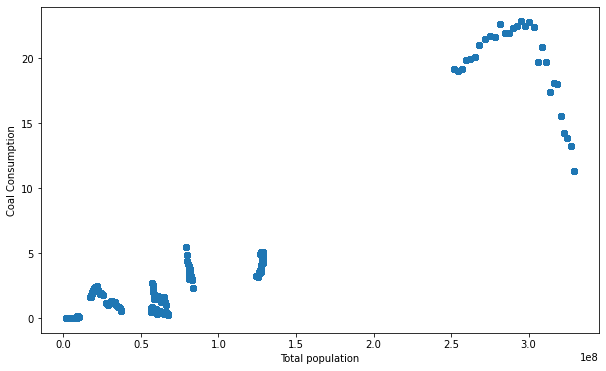

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_final_rel_t['Total population'], df_final_rel_t['Coal Consumption - EJ'])
ax.set_xlabel('Total population')
ax.set_ylabel('Coal Consumption')
plt.show()

Corrélation entre le total de la population et des consommations d'énergie sur les pays à revenus intermédiaires

,CO2_level,Total population,Temp_values,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
CO2_level,1.000000,0.123946,0.106045,0.325714,0.333091,0.346893,0.323245,0.418699,0.268760,0.344673,0.323327
Total population,0.123946,1.000000,0.149913,0.907511,0.582864,0.535932,0.794217,0.606110,0.364145,0.498121,0.867197
Temp_values,0.106045,0.149913,1.000000,0.204739,0.225565,0.204717,0.220784,0.227184,0.183017,0.205548,0.211000
Coal Consumption - EJ,0.325714,0.907511,0.204739,1.000000,0.757753,0.734927,0.949167,0.798367,0.507440,0.694298,0.965377
Gas Consumption - EJ,0.333091,0.582864,0.225565,0.757753,1.000000,0.948036,0.885549,0.905056,0.763016,0.891705,0.877856
Geo Biomass Other - TWh,0.346893,0.535932,0.204717,0.734927,0.948036,1.000000,0.896816,0.975460,0.894503,0.981708,0.839287
Hydro Generation - TWh,0.323245,0.794217,0.220784,0.949167,0.885549,0.896816,1.000000,0.922207,0.689066,0.866801,0.969755
Nuclear Generation - TWh,0.418699,0.606110,0.227184,0.798367,0.905056,0.975460,0.922207,1.000000,0.897960,0.974124,0.867409
Solar Generation - TWh,0.268760,0.364145,0.183017,0.507440,0.763016,0.894503,0.689066,0.897960,1.000000,0.930522,0.612246
Wind Generation -TWh,0.344673,0.498121,0.205548,0.694298,0.891705,0.981708,0.866801,0.974124,0.930522,1.000000,0.780576


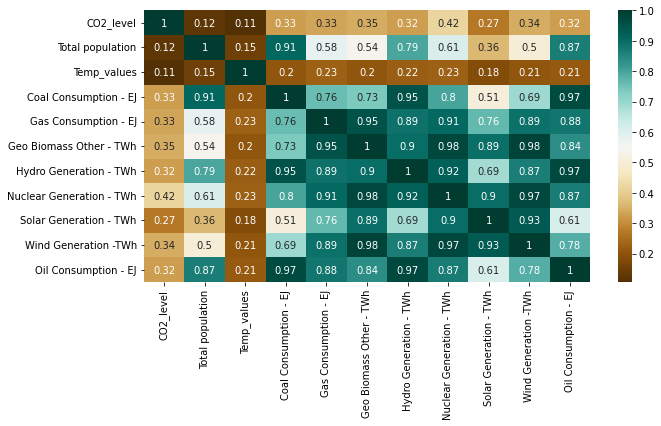

In [ ]:
plt.figure(figsize=(10,5))
fig = df_final_rint_t[['CO2_level','Total population','Temp_values','Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].corr()
sns.heatmap(fig,cmap="BrBG",annot=True)
fig

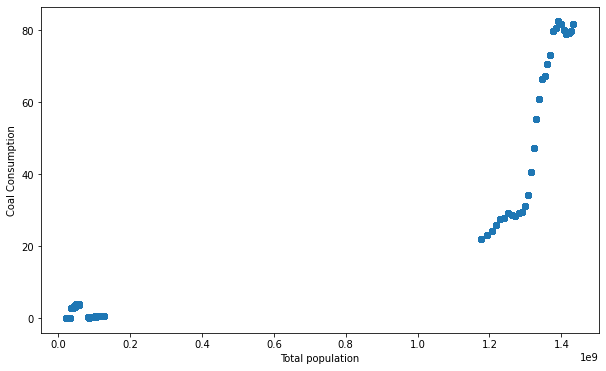

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_final_rint_t['Total population'], df_final_rint_t['Coal Consumption - EJ'])
ax.set_xlabel('Total population')
ax.set_ylabel('Coal Consumption')
plt.show()

Corrélation entre le total de la population et des consommations d'énergie sur les pays à revenus faibles

,CO2_level,Total population,Temp_values,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
CO2_level,1.000000,-0.475083,0.257384,-0.360206,0.347207,-0.158106,-0.438731,-0.309990,-0.019594,-0.121208,-0.324732
Total population,-0.475083,1.000000,-0.257470,0.944085,0.465574,0.736679,0.978904,0.900943,0.408576,0.669013,0.937317
Temp_values,0.257384,-0.257470,1.000000,-0.196020,-0.078345,-0.108322,-0.255259,-0.174340,-0.030271,-0.075483,-0.206722
Coal Consumption - EJ,-0.360206,0.944085,-0.196020,1.000000,0.520205,0.914869,0.972808,0.982319,0.596813,0.866345,0.983775
Gas Consumption - EJ,0.347207,0.465574,-0.078345,0.520205,1.000000,0.546919,0.528919,0.535100,0.365715,0.530238,0.618751
Geo Biomass Other - TWh,-0.158106,0.736679,-0.108322,0.914869,0.546919,1.000000,0.823228,0.933924,0.683668,0.959725,0.893989
Hydro Generation - TWh,-0.438731,0.978904,-0.255259,0.972808,0.528919,0.823228,1.000000,0.938233,0.502715,0.767671,0.972106
Nuclear Generation - TWh,-0.309990,0.900943,-0.174340,0.982319,0.535100,0.933924,0.938233,1.000000,0.630463,0.888861,0.973521
Solar Generation - TWh,-0.019594,0.408576,-0.030271,0.596813,0.365715,0.683668,0.502715,0.630463,1.000000,0.847636,0.600464
Wind Generation -TWh,-0.121208,0.669013,-0.075483,0.866345,0.530238,0.959725,0.767671,0.888861,0.847636,1.000000,0.857539


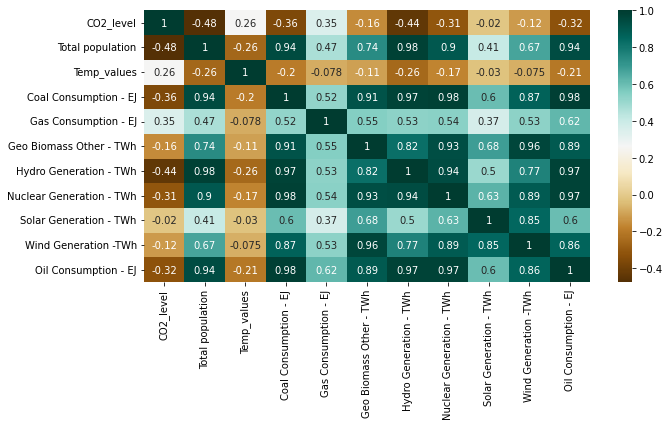

In [ ]:
plt.figure(figsize=(10,5))
fig = df_final_rinf_t[['CO2_level','Total population','Temp_values','Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].corr()
sns.heatmap(fig,cmap="BrBG",annot=True)
fig

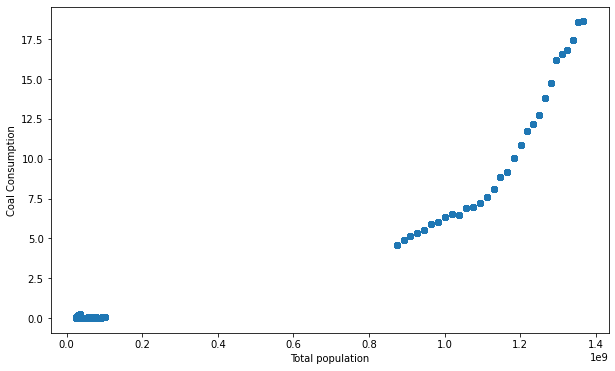

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_final_rinf_t['Total population'], df_final_rinf_t['Coal Consumption - EJ'])
ax.set_xlabel('Total population')
ax.set_ylabel('Coal Consumption')
plt.show()

**Relation entre le niveau de CO2 et le changement de température**

In [ ]:
df_final_t = df_final[df_final["Element"]=='Temperature change']

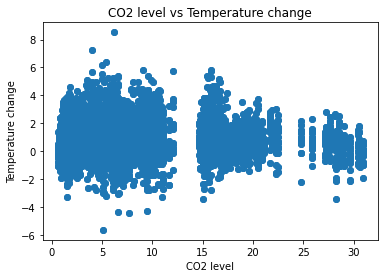

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df_final_t['CO2_level'], df_final_t['Temp_values'])

# Add axis labels and title
plt.xlabel('CO2 level')
plt.ylabel('Temperature change')
plt.title('CO2 level vs Temperature change')
plt.show()

**Consommation de charbon par pays**

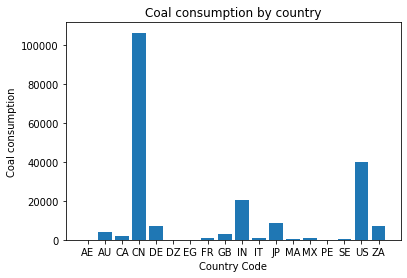

In [ ]:
import matplotlib.pyplot as plt

# Group data by country code
grouped_data = df_final.groupby('Country_Code')['Coal Consumption - EJ'].sum()

# Create bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Add axis labels and title
plt.xlabel('Country Code')
plt.ylabel('Coal consumption')
plt.title('Coal consumption by country')
plt.show()

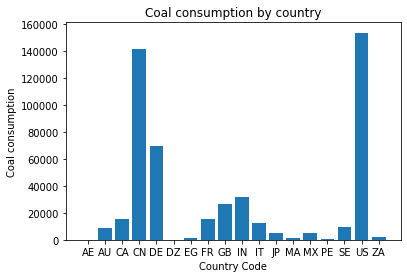

In [ ]:
import matplotlib.pyplot as plt

# Group data by country code
grouped_data = df_final.groupby('Country_Code')['Wind Generation -TWh'].sum()

# Create bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Add axis labels and title
plt.xlabel('Country Code')
plt.ylabel('Coal consumption')
plt.title('Coal consumption by country')
plt.show()

**Comparaison des éléments CO2 niveau, total population, Coal consumption selon un échantillon de pays par niveau de revenu**

In [ ]:
df_final_rel["Country"].unique()

array(['United Arab Emirates', 'Australia', 'Canada', 'Germany', 'France',
       'United Kingdom', 'Italy', 'Japan', 'Sweden',
       'United States of America'], dtype=object)

. Niveau de revenu elevé : France

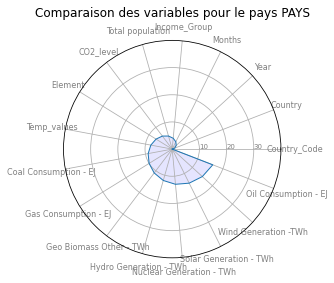

In [ ]:
import numpy as np

# Créer un graphique en radar pour comparer les différentes variables pour chaque pays
variables = list(df_final.columns[1:])  # Liste des noms de colonnes, sans le pays
N = len(variables)
values = df_final.loc[df_final['Country_Code'] == 'FR'].values.tolist()[0][1:] # Liste des valeurs pour le pays choisi

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Pour fermer le polygone

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], variables, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0, 40)

values += values[:1]  # Pour fermer le polygone
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Comparaison des variables pour le pays France')
plt.show()


. Niveau de revenu intermédiaire : Mexique



In [ ]:
df_final_rint["Country_Code"].unique()

array(['CN', 'MX', 'PE', 'ZA'], dtype=object)

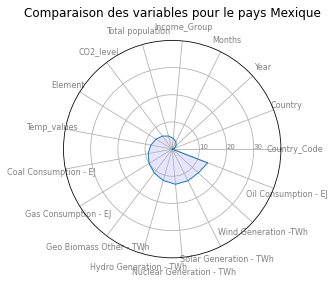

In [ ]:
import numpy as np

# Créer un graphique en radar pour comparer les différentes variables pour chaque pays
variables = list(df_final.columns[1:])  # Liste des noms de colonnes, sans le pays
N = len(variables)
values = df_final.loc[df_final['Country_Code'] == 'PE'].values.tolist()[0][1:] # Liste des valeurs pour le pays choisi

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Pour fermer le polygone

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], variables, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0, 40)

values += values[:1]  # Pour fermer le polygone
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Comparaison des variables pour le pays Mexique')
plt.show()

In [ ]:
df_final_rinf["Country_Code"].unique()

array(['DZ', 'EG', 'IN', 'MA'], dtype=object)

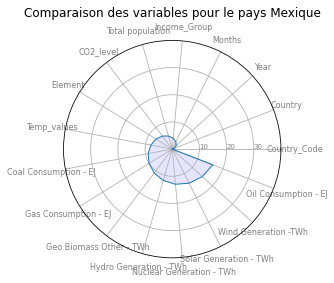

In [ ]:
import numpy as np

# Créer un graphique en radar pour comparer les différentes variables pour chaque pays
variables = list(df_final.columns[1:])  # Liste des noms de colonnes, sans le pays
N = len(variables)
values = df_final.loc[df_final['Country_Code'] == 'IN'].values.tolist()[0][1:] # Liste des valeurs pour le pays choisi

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Pour fermer le polygone

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], variables, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0, 40)

values += values[:1]  # Pour fermer le polygone
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Comparaison des variables pour le pays Mexique')
plt.show()

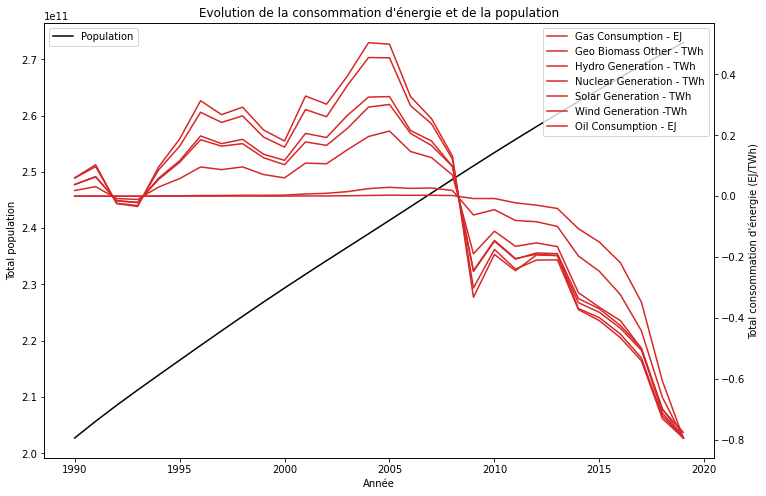

In [45]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes à visualiser
cols_energy = ['Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh',
               'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']
cols_pop = ['Year', 'Total population']
cols_co2 = ['Year', 'CO2_level']

# Filtrer les données pour ne garder que les consommations d'énergie et la population
df_energy = df_final[cols_energy + cols_pop].groupby('Year')[cols_energy + cols_pop].sum()
df_co2 = df_final[cols_co2].groupby('Year')[cols_co2].mean()

# Calculer le niveau moyen de CO2 pour chaque année
co2_mean = df_co2[cols_co2[1]].mean()

# Définir les couleurs à utiliser pour chaque niveau de CO2
colors = { 'Low': 'tab:green', 'Medium': 'tab:orange', 'High': 'tab:red'}

# Créer le graphique
fig, ax1 = plt.subplots(figsize=(12, 8))

# Ajouter la courbe de population sur l'axe des ordonnées gauche
ax1.set_xlabel('Année')
ax1.set_ylabel('Total population', color='black')
ax1.plot(df_energy.index, df_energy[cols_pop[1]].values, label='Population', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Ajouter les courbes de consommation d'énergie sur l'axe des ordonnées droit
ax2 = ax1.twinx()
ax2.set_ylabel('Total consommation d\'énergie (EJ/TWh)', color='black')

# Calculer les valeurs normalisées pour chaque type d'énergie en fonction du niveau de CO2
for col in cols_energy[1:]:
    df_energy[col+'_norm'] = df_energy[col] / df_energy[col].max() * (df_co2[cols_co2[1]] - co2_mean)

# Ajouter les courbes normalisées sur le graphique
for col in cols_energy[1:]:
    ax2.plot(df_energy.index, df_energy[col+'_norm'].values, label=col, color=colors['Low'] if df_co2.loc[df_energy.index[0], cols_co2[1]] <= co2_mean else colors['High'])
ax2.tick_params(axis='y', labelcolor='black')

# Ajouter les légendes et le titre
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Evolution de la consommation d\'énergie et de la population')

# Afficher le graphique
plt.show()


#Evolution du niveau de CO2 par habitant vs Evolution de consommation d'énergie selon le type de revenus des pays

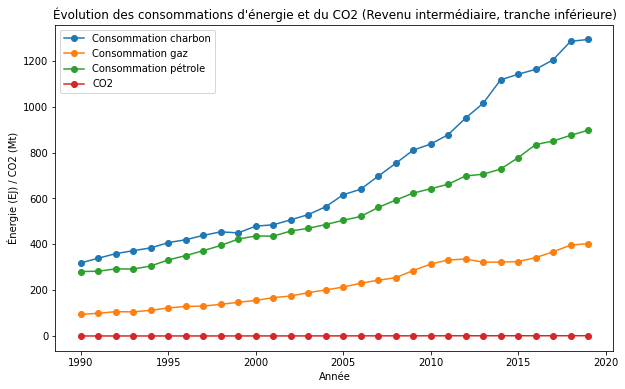

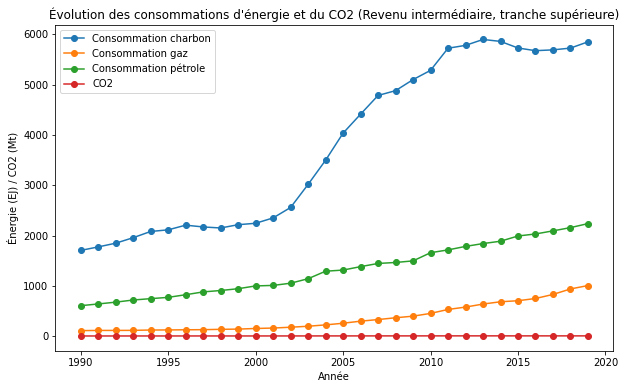

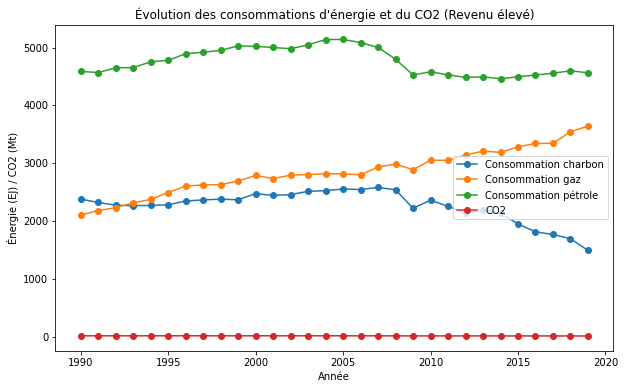

In [18]:
# On sélectionne les colonnes qui nous intéressent
df_select = df_final[['Country', 'Year', 'Income_Group', 'CO2_level', 'Coal Consumption - EJ', 'Gas Consumption - EJ', 'Oil Consumption - EJ']]

# On calcule la somme de chaque type de consommation d'énergie par année et par groupe de revenu
df_agg = df_select.groupby(['Year', 'Income_Group']).sum()

# On calcule la moyenne du CO2 par année et par groupe de revenu
df_agg['CO2_mean'] = df_select.groupby(['Year', 'Income_Group']).mean()['CO2_level']

# On crée un graphe pour chaque groupe de revenu
for income_group in df_agg.index.get_level_values('Income_Group').unique():
    
    # On crée une figure et des axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # On sélectionne les données pour le groupe de revenu en cours
    data = df_agg.xs(income_group, level='Income_Group')
    
    # On trace l'évolution des consommations d'énergie
    ax.plot(data.index, data['Coal Consumption - EJ'], label='Consommation charbon', marker='o')
    ax.plot(data.index, data['Gas Consumption - EJ'], label='Consommation gaz', marker='o')
    ax.plot(data.index, data['Oil Consumption - EJ'], label='Consommation pétrole', marker='o')
    
    # On trace l'évolution du CO2
    ax.plot(data.index, data['CO2_mean'], label='CO2', marker='o')
    
    # On ajoute un titre, des légendes et des labels
    ax.set_title(f'Évolution des consommations d\'énergie et du CO2 ({income_group})')
    ax.legend()
    ax.set_xlabel('Année')
    ax.set_ylabel('Énergie (EJ) / CO2 (Mt)')

# On affiche les graphes
plt.show()
